In [7]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.cluster import DBSCAN

data = pd.read_excel('RawData.xlsx')
data.head()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score

DBSCAN_cluster = DBSCAN(eps=2.6, min_samples=5).fit(scaled_data)
DBSCAN_cluster.labels_
labels = DBSCAN_cluster.labels_
truelabels2 = pd.read_excel('RawData_Label.xlsx', usecols = ['label'])
truelabels = truelabels2.values.flatten()

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(labels)

rand = adjusted_rand_score(truelabels, labels)
print(rand)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


[ 0  0  0 ... -1 -1 -1]
0.4675128306003357
Estimated number of clusters: 10
Estimated number of noise points: 979


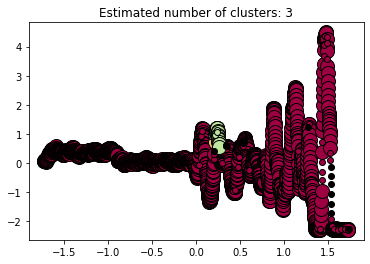

In [31]:
import matplotlib.pyplot as plt

core_samples_mask = np.zeros_like(DBSCAN_cluster.labels_, dtype=bool)
core_samples_mask[DBSCAN_cluster.core_sample_indices_] = True
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = scaled_data[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = scaled_data[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()